In [2]:
from Bio import SeqIO
import pandas as pd
import json

# read in files
mads_fasta_mikc = SeqIO.to_dict(SeqIO.parse(
    'MIKC_MADS.fas', 'fasta'))
mads_fasta_mtype = SeqIO.to_dict(SeqIO.parse(
    'M-type_MADS.fas', 'fasta'))

fpkm = pd.read_csv(
    'poplar-PSDX/FPKM.csv', sep=',', index_col=0)


In [3]:
# get all MADS gene ids
mads_gene_ids = [info.split('|')[0][:16] for info in list(mads_fasta_mikc.keys())] + \
    [info.split('|')[0][:16] for info in list(mads_fasta_mtype.keys())]


In [ ]:
# reformat the FPKM data source
#  => data description
#  => expression tables
row = fpkm.head(1).FPKM
column = [row_section.split("|")[1] for row_section in row.values[0].split(',')]
row = list(fpkm.index)
source_dict = {}
expression_table = pd.DataFrame(columns=column, index=row)
from tqdm import tqdm
import numpy as np
for sn,row in tqdm(fpkm.iterrows()):
    for row_section in [row_section.split("|") for row_section in row.values[0].split(',')]:
        source = row_section[0]
        description = row_section[1]
        exp_value = float(row_section[2])
        source_dict[description] = source
        expression_table.loc[sn,description] = exp_value    
# check the first 5 lines
expression_table.head(5)

# save the files
expression_table.to_csv("neo_fpkm.csv")

with open('trt_whole.json', 'w') as fp:
    json.dump(source_dict, fp, indent=4)


In [101]:
# do some exploration of the samples
# original way to segment data: http://forestry.fafu.edu.cn/db/SDX/expression_profile/expression.py?gene_name=Potri.001G011000
source_dict = json.load(open('trt_whole.json'))
trt_list = list(source_dict.keys())

trt_type = {
    "stress":['SDX-drought','Leaf-','Root-','Stem-'], # stress
    "tissue":['ShootTip','LeafR','Phloem','PrimaryRoot','XylemFiberCell','SDXR','ThreeCell'], # tissue
    "transgenic":['miR397','sGFP','PtrSND1-B1+sGFP'] # transgenic line
}
# unknown: "SDXRep1" ,"ThreeCell"
trt_samples = {
    "stress":[], # stress
    "tissue":[], # tissue
    "transgenic":[] # transgenic line
}
for trt_name,keywords in trt_type.items():
    count = 0
    for keyword in keywords:
        
        # print(len([trt for trt in trt_list if trt.startswith(keyword)]))
        trts = [trt for trt in trt_list if trt.startswith(keyword)]
        count += len(trts)
        trt_samples[trt_name].extend(trts)
        
    print(count)


92
21
30


In [106]:
expression_table = pd.read_csv("neo_fpkm.csv")
expression_table.set_index(['Unnamed: 0'], inplace=True)
focal_table = expression_table[expression_table.index.isin(mads_gene_ids)]
# focal_table.dropna(inplace=True)

In [117]:
current_table.to_csv("checking.csv")

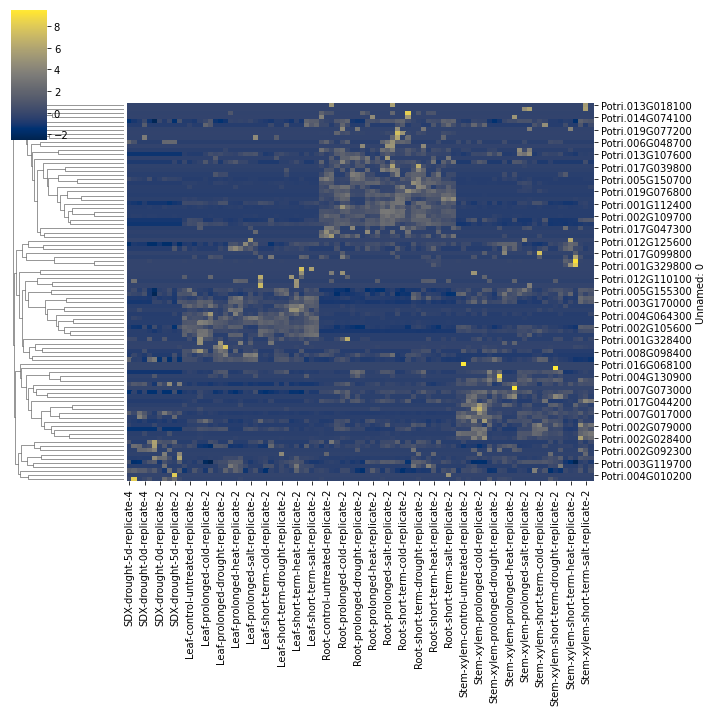

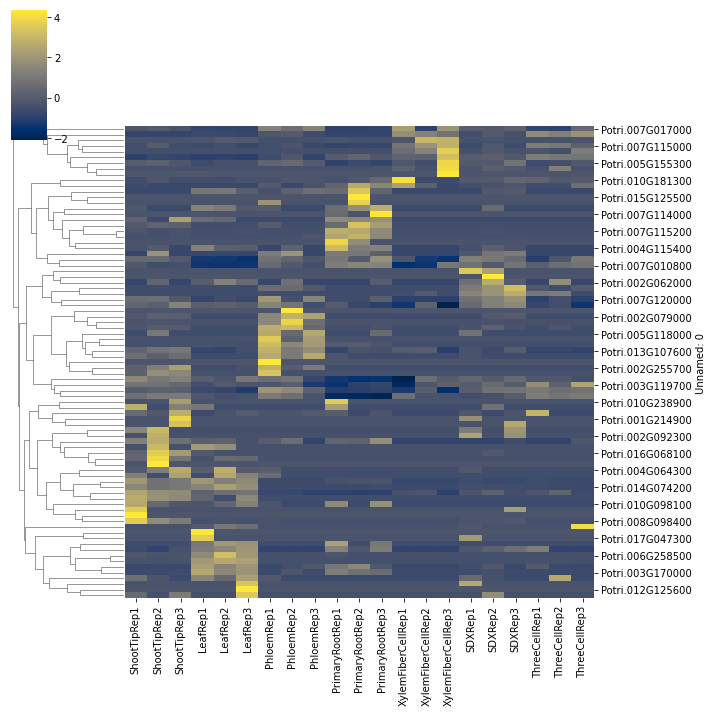

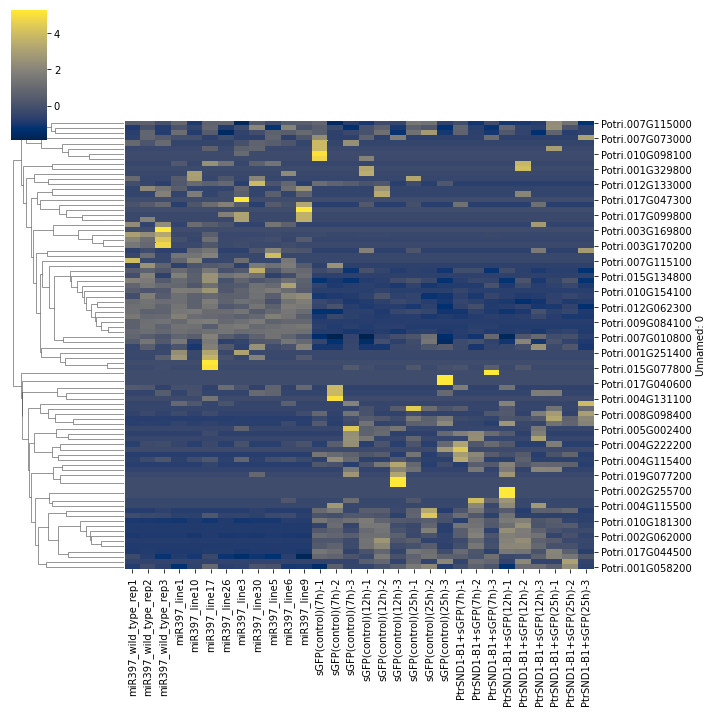

In [124]:
for trt_name,samples in trt_samples.items():
    current_table = focal_table[samples]
    current_table = current_table.loc[(current_table!=0).any(axis=1)]
    sns.clustermap(current_table,
    #  standard_scale = 0,
     z_score=0,
     col_cluster = False,
     cmap = 'cividis'
    #  row_cluster = False,
    
    )
    

/opt/homebrew/anaconda3/envs/binf36/lib/python3.6/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


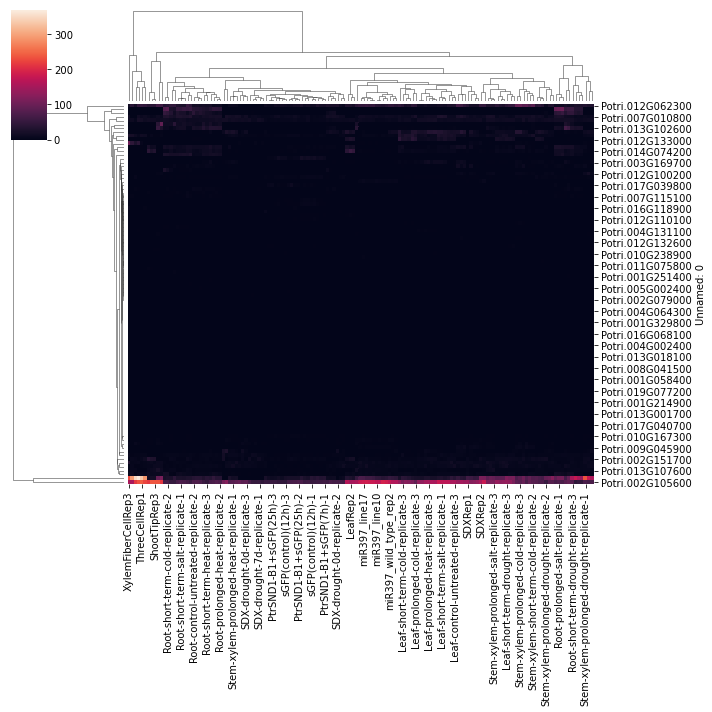

In [66]:
# vizualize
# https://seaborn.pydata.org/generated/seaborn.clustermap.html

# filtering low reads
# https://www.biostars.org/p/275156/
# drop rows with all zeros
# https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame


import seaborn as sns
sns.clustermap(focal_table)